<Axes: xlabel='x', ylabel='y'>

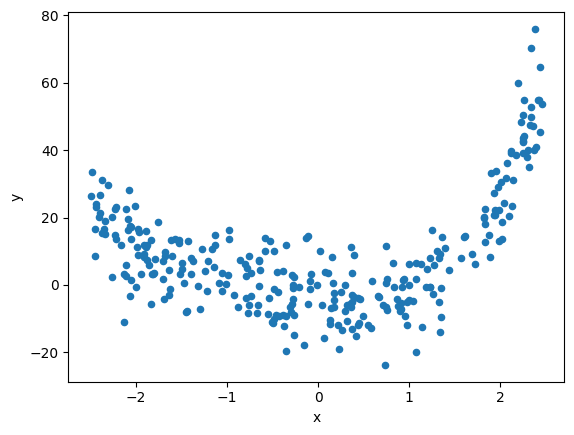

In [1]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

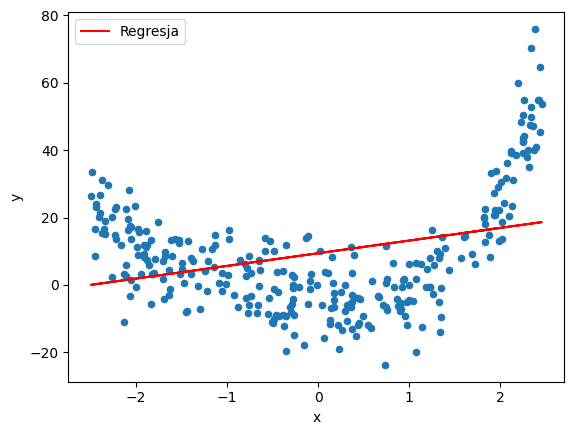

In [5]:
ax = df.plot.scatter(x='x', y='y')
ax.plot(X_train, lin_reg.predict(X_train.reshape(-1, 1)), color='red', label='Regresja')
plt.legend()
plt.show()

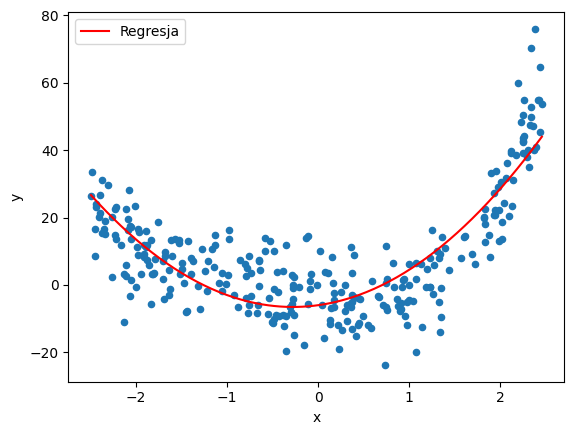

In [6]:
from sklearn. preprocessing import PolynomialFeatures 
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_2 = poly_features_2.fit_transform(X_train.reshape(-1,1))
poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_train_poly_2, y_train)
ax = df.plot.scatter(x='x', y='y')
X_values_poly_2 = np.linspace(df['x'].min(), df['x'].max(), 240).reshape(-1, 1)
y_values_poly_2 = poly_reg_2.predict(poly_features_2.transform(X_values_poly_2))
ax.plot(X_values_poly_2, y_values_poly_2, color='red', label='Regresja')
plt.legend()
plt.show()

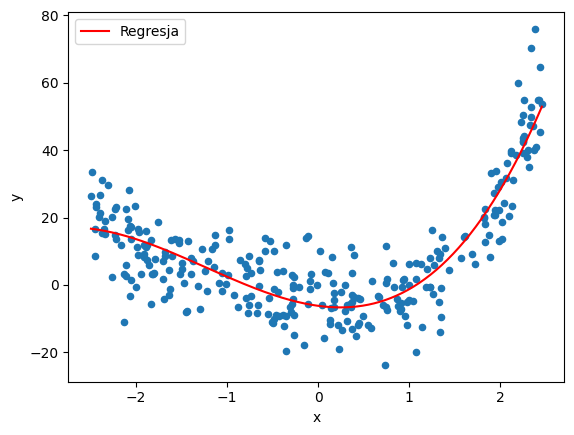

In [7]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_3 = poly_features_3.fit_transform(X_train.reshape(-1,1))
poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_train_poly_3, y_train)
ax = df.plot.scatter(x='x', y='y')
X_values = np.linspace(df['x'].min(), df['x'].max(), 240).reshape(-1, 1)
y_values = poly_reg_3.predict(poly_features_3.transform(X_values))
ax.plot(X_values, y_values, color='red', label='Regresja')
plt.legend()
plt.show()

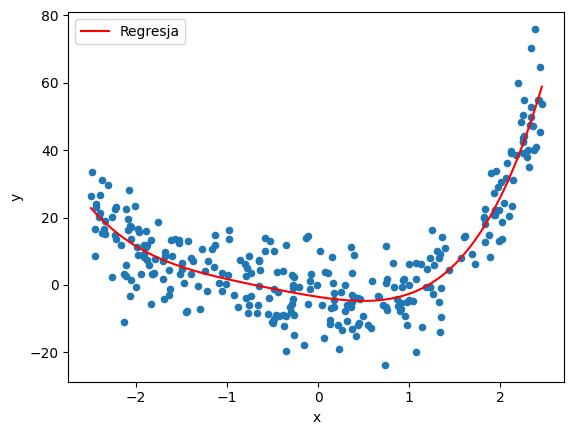

In [8]:
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly_4 = poly_features_4.fit_transform(X_train.reshape(-1,1))
poly_reg_4 = LinearRegression()
poly_reg_4.fit(X_train_poly_4, y_train)
ax = df.plot.scatter(x='x', y='y')
X_values = np.linspace(df['x'].min(), df['x'].max(), 300).reshape(-1, 1)
y_values = poly_reg_4.predict(poly_features_4.transform(X_values))
ax.plot(X_values, y_values, color='red', label='Regresja')
plt.legend()
plt.show()

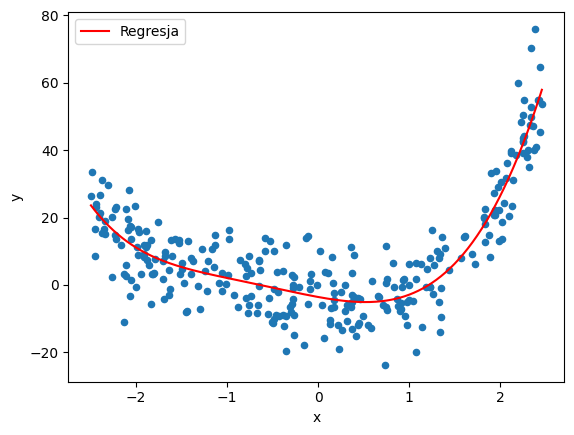

In [9]:
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly_5 = poly_features_5.fit_transform(X_train.reshape(-1,1))
poly_reg_5 = LinearRegression()
poly_reg_5.fit(X_train_poly_5, y_train)
ax = df.plot.scatter(x='x', y='y')
X_values = np.linspace(df['x'].min(), df['x'].max(), 300).reshape(-1, 1)
y_values = poly_reg_5.predict(poly_features_5.transform(X_values))
ax.plot(X_values, y_values, color='red', label='Regresja')
plt.legend()
plt.show()

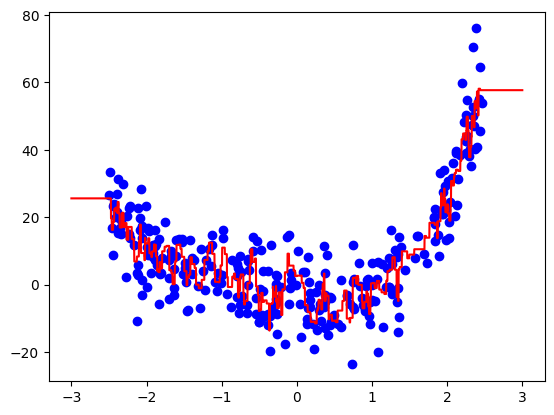

In [10]:
import sklearn.neighbors
knn_reg3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg3.fit(X_train.reshape(-1,1),y_train)
plt.clf()
plt.scatter(X, y, c="blue")
X_new3 = np.arange(-3, 3, 0.001).reshape(-1,1)
plt.plot(X_new3, knn_reg3.predict(X_new3), c="red")


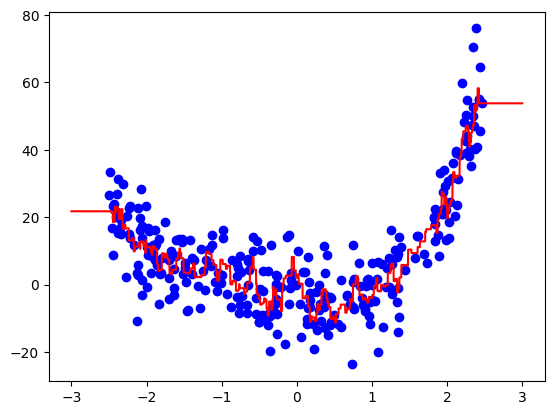

In [11]:
knn_reg5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg5.fit(X_train.reshape(-1,1),y_train)
plt.clf()
plt.scatter(X, y, c="blue")
X_new5 = np.arange(-3, 3, 0.001).reshape(-1,1)
plt.plot(X_new5, knn_reg5.predict(X_new5), c="red")

In [12]:
from sklearn.metrics import mean_squared_error

X_test_poly_2 = poly_features_2.fit_transform(X_test.reshape(-1,1))
X_test_poly_3 = poly_features_3.fit_transform(X_test.reshape(-1,1))
X_test_poly_4 = poly_features_4.fit_transform(X_test.reshape(-1,1))
X_test_poly_5 = poly_features_5.fit_transform(X_test.reshape(-1,1))

mselr = mean_squared_error(y_train, lin_reg.predict(X_train.reshape(-1, 1)))
mseknn3 = mean_squared_error(y_train, knn_reg3.predict(X_train.reshape(-1, 1)))
mseknn5 = mean_squared_error(y_train,knn_reg5.predict(X_train.reshape(-1, 1)))
msepr2 = mean_squared_error(y_train, poly_reg_2.predict(X_train_poly_2))
msepr3 = mean_squared_error(y_train, poly_reg_3.predict(X_train_poly_3))
msepr4 = mean_squared_error(y_train, poly_reg_4.predict(X_train_poly_4))
msepr5 = mean_squared_error(y_train, poly_reg_5.predict(X_train_poly_5))

mselr_test = mean_squared_error(y_test, lin_reg.predict(X_test.reshape(-1, 1)))
mseknn3_test = mean_squared_error(y_test, knn_reg3.predict(X_test.reshape(-1, 1)))
mseknn5_test = mean_squared_error(y_test, knn_reg5.predict(X_test.reshape(-1, 1)))
msepr2_test = mean_squared_error(y_test, poly_reg_2.predict(X_test_poly_2))
msepr3_test = mean_squared_error(y_test, poly_reg_3.predict(X_test_poly_3))
msepr4_test = mean_squared_error(y_test, poly_reg_4.predict(X_test_poly_4))
msepr5_test = mean_squared_error(y_test, poly_reg_5.predict(X_test_poly_5))

print(mselr)
print(mseknn3)
print(mseknn5)
print(msepr2)
print(msepr3)
print(msepr4)
print(msepr5)

print("dla testowych:")

print(mselr_test)
print(mseknn3_test)
print(mseknn5_test)
print(msepr2_test)
print(msepr3_test)
print(msepr4_test)
print(msepr5_test)

data = {'train_mse': [mselr, mseknn3, mseknn5, msepr2, msepr3, msepr4, msepr5],
       'test_mse': [mselr_test, mseknn3_test, mseknn5_test, msepr2_test, msepr3_test, msepr4_test, msepr5_test]}
dfmse = pd.DataFrame(data, columns=['train_mse', 'test_mse'], index=['lin_reg','knn_3_reg','knn_5_reg','poly_2_reg','poly_3_reg','poly_4_reg','poly_5_reg'])
dfmse.head(7)

266.3542097183374
40.631312657477935
48.56693736738542
82.24307485893178
63.03798461395099
57.028569613386615
56.922512169264074
dla testowych:
267.44270296573427
89.1350868851015
83.32029054561721
107.51425817882242
86.86837837516926
77.93578557381971
77.39475081028597


,train_mse,test_mse
lin_reg,266.354210,267.442703
knn_3_reg,40.631313,89.135087
knn_5_reg,48.566937,83.320291
poly_2_reg,82.243075,107.514258
poly_3_reg,63.037985,86.868378
poly_4_reg,57.028570,77.935786
poly_5_reg,56.922512,77.394751


In [13]:
import pickle
with open("mse.pkl", 'wb') as file:
    pickle.dump(dfmse, file)

In [14]:
tuples = [(lin_reg, None), (knn_reg3, None), (knn_reg5, None), (poly_reg_2, poly_features_2), (poly_reg_3, poly_features_3), (poly_reg_4, poly_features_4), (poly_reg_5, poly_features_5)]

In [15]:
print(tuples)

[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]


In [16]:
with open("reg.pkl", 'wb') as file:
    pickle.dump(tuples, file)